In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("Kmeans.csv")
df.head()

,Ad,Yas,Gelir
0,Ismail,28,5900
1,Kaan,42,15100
2,Ozben,27,5750
3,Galip,39,15400
4,Batuhan,41,15900


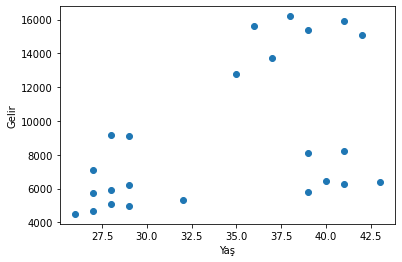

In [2]:
plt.scatter(df.Yas,df.Gelir)
plt.xlabel("Yaş")
plt.ylabel("Gelir")
plt.show()

In [3]:
scaler = MinMaxScaler()

scaler.fit(df[["Gelir"]])
df["Gelir"] = scaler.transform(df[['Gelir']])

scaler.fit(df[["Yas"]])
df["Yas"] = scaler.transform(df[["Yas"]])

"""
scaler.fit(df.iloc[:,1:])
df.iloc[:,1:]=scaler.transform(df.iloc[:,1:])

"""
df.head()

,Ad,Yas,Gelir
0,Ismail,0.117647,0.119658
1,Kaan,0.941176,0.905983
2,Ozben,0.058824,0.106838
3,Galip,0.764706,0.931624
4,Batuhan,0.882353,0.974359


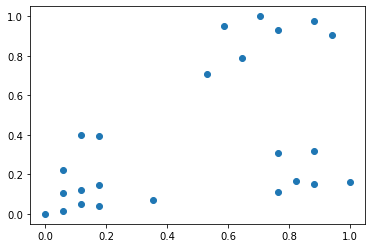

In [4]:
plt.scatter(df["Yas"],df["Gelir"])
plt.show()

In [5]:
kmeans_model = KMeans(n_clusters=3)
y_predicted = kmeans_model.fit_predict(df[["Yas","Gelir"]])
y_predicted

array([1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1])

In [6]:
df["Cluster"] = y_predicted
df.tail(5)

,Ad,Yas,Gelir,Cluster
19,Koray,0.764706,0.307692,0
20,Melih,0.117647,0.401709,1
21,Seyma,0.882353,0.316239,0
22,Tuncer,0.764706,0.111111,0
23,Melih,0.176471,0.393162,1


In [23]:
# Centroidleri görelim :  
kmeans_model.cluster_centers_

array([[0.85294118, 0.20299145],
       [0.12834225, 0.14219114],
       [0.72268908, 0.89377289]])

ValueError: x and y must be the same size

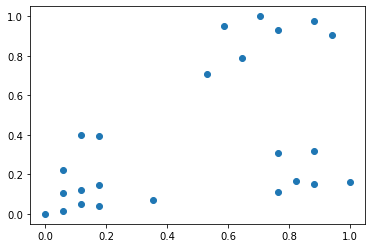

In [18]:
plt.scatter(df.Yas,df.Gelir)
plt.scatter(centers,)

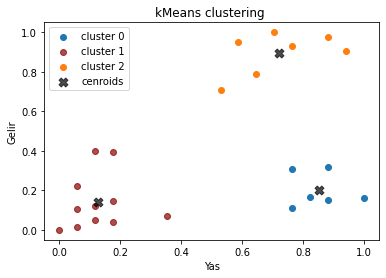

In [70]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.figure(figsize=(6,4))
plt.title("kMeans clustering ")
plt.xlabel("Yas")
plt.ylabel("Gelir")

plt.scatter(df1["Yas"],df1["Gelir"],label="cluster 0")
plt.scatter(df2["Yas"],df2["Gelir"],label="cluster 1",color="darkred",alpha=0.7)
plt.scatter(df3["Yas"],df3["Gelir"],label="cluster 2")
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],c="black",marker="X",label="cenroids",s=80,alpha=0.7)
plt.legend()
plt.savefig("kMeans.png")
plt.show()

In [74]:
df.sort_values("Cluster")[["Ad","Cluster"]]

,Ad,Cluster
21,Seyma,0
19,Koray,0
18,Nihal,0
17,Gurkan,0
16,Veli,0
22,Tuncer,0
0,Ismail,1
20,Melih,1
15,Rauf,1
14,Seyma,1


## K değerini belirlemek - (Elbow yöntemi)

In [82]:
k_range = range(1,20)
list_dist = []
for k in k_range:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df[["Yas","Gelir"]])
    list_dist.append(kmeans_model.inertia_)

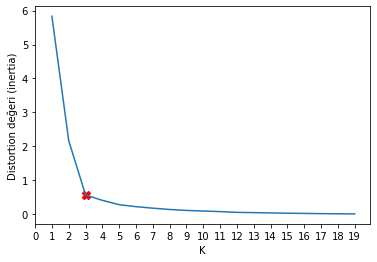

In [106]:
plt.xlabel("K")
plt.ylabel('Distortion değeri (inertia)')
plt.plot(k_range,list_dist)
plt.scatter(3,list_dist[2],marker= "X",c="red",s=70)
plt.xticks(range(0,20))
plt.savefig("distortionCurve.png")
plt.show()

#### Sonuç :
***En iyi K değeri = 3***